<a href="https://colab.research.google.com/github/Abhishek-jakhar/Machine_learning/blob/main/5_Linear%20regression/LR(part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('/content/placement.csv')

In [5]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0.5, 1.0, 'cgpa v/s package')

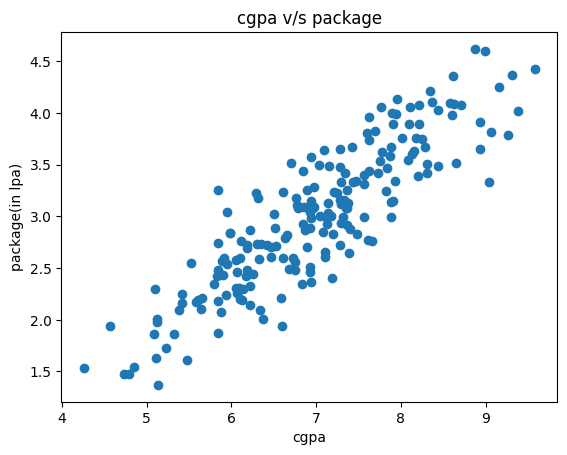

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')
plt.title('cgpa v/s package')


In [7]:
#seprate the input and output column
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [8]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [9]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [10]:
# splitting the data into train and test arrays
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state=2)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
x_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [14]:
y_test.head()

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94


In [15]:
lr.predict(x_test.iloc[0].values.reshape(1,1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0.5, 1.0, 'cgpa v/s package')

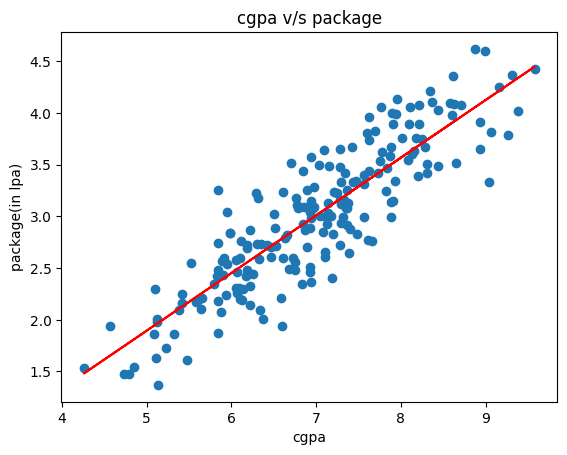

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.ylabel('package(in lpa)')
plt.title('cgpa v/s package')


In [17]:
# we will find the slope and y intercept of the fit line
m = lr.coef_
m

array([0.55795197])

In [18]:
c = lr.intercept_
c

np.float64(-0.8961119222429144)

In [19]:
# the eq of line is
# y = mx + c

# **calculating errors**

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [23]:
y_predt = lr.predict(x_test)

In [22]:
y_test.values  # actual data

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [25]:
print('MAE is ', mean_absolute_error(y_predt,y_test))

MAE is  0.2884710931878175


In [26]:
print('MSE is ', mean_squared_error(y_predt,y_test))


MSE is  0.12129235313495527


In [28]:
print('RMSE is ',np.sqrt(mean_squared_error(y_predt,y_test)))

RMSE is  0.34827051717731616


In [30]:
print('R2 score is ', r2_score(y_test,y_predt))


R2 score is  0.780730147510384


In [33]:
# adjusted R2 score
x_test.shape[1]

1

In [35]:

print('adjusted r2 score is ', 1-(((1-r2_score(y_test,y_predt))*(x_test.shape[0]-1))/((x_test.shape[0]-1-x_test.shape[1]))))

adjusted r2 score is  0.7749598882343415
